Link dataset : https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility

Dataset ini aslinya ada 76 atribut tetapi hanya 14 atribut saja yang dipublikasikan. kolom 'target' merupakan kolom target dengan ketentuan bahwa 0 tidak/kurang beresiko terkena serangan jantung, sedangkan 1 lebih beresiko terkena serangan jantung.

informasi atribut : 
1. age = umur dalam tahun
2. sex = jenis kelamin (0 = perempuan, 1 = laki - laki)
3. cp = chest pain type / tipe nyeri dada (4 nilai yaitu 0, 1, 2, 3) => 0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic
4. trestbps = resting blood pressure / tekanan darah
5. chol = serum kolesterol dalam mg/dl
6. fbs = fasting blood sugar / gula darah saat puasa : 120 mg/dl maka nilainya 1, jika tidak 0
7. restecg = resting electrocardiographic results / hasil elektrokardiografi saat istirahat (nilai 0,1,2)
8. thalach = maximum heart rate achieved / detak jantung maksimum.
9. exang = exercise induced angina / angina yang diinduksi.
10. oldpeak = ST depression induced by exercise relative to rest / ST Depression disebabkan oleh latihan yang berhubungan dengan istirahat. 
11. slope = the slope of the peak exercise ST segment / kemiringan puncak latihan dari ST Segment.
12. ca = number of major vessels colored by flourosopy / nomor dari pembuluh utama (0,1,2,3,4)
13. thal = 0 = normal; 1 = fixed defect/cacat tetap; 2 = reversible defect/cacat yang bisa dipulihkan.
14. target: 0= kurang beresiko terkena serangan jantung; 1= lebih beresiko terkena serangan jantung

In [1]:
#importing library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_heart = pd.read_csv('heart.csv')

In [3]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df_heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
dups_data = df_heart.duplicated()
print('Jumlah baris yang ada duplikat: %d' % dups_data.sum())

Jumlah baris yang ada duplikat: 1


In [8]:
#drop baris yang ada duplikat
print('Jumlah baris sebelum membuang duplikat = %d' % df_heart.shape[0])

data_heart = df_heart.drop_duplicates()
print('Jumlah baris setelah membuang duplikat = %d' % data_heart.shape[0])

Jumlah baris sebelum membuang duplikat = 303
Jumlah baris setelah membuang duplikat = 302


In [9]:
data_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
data_heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

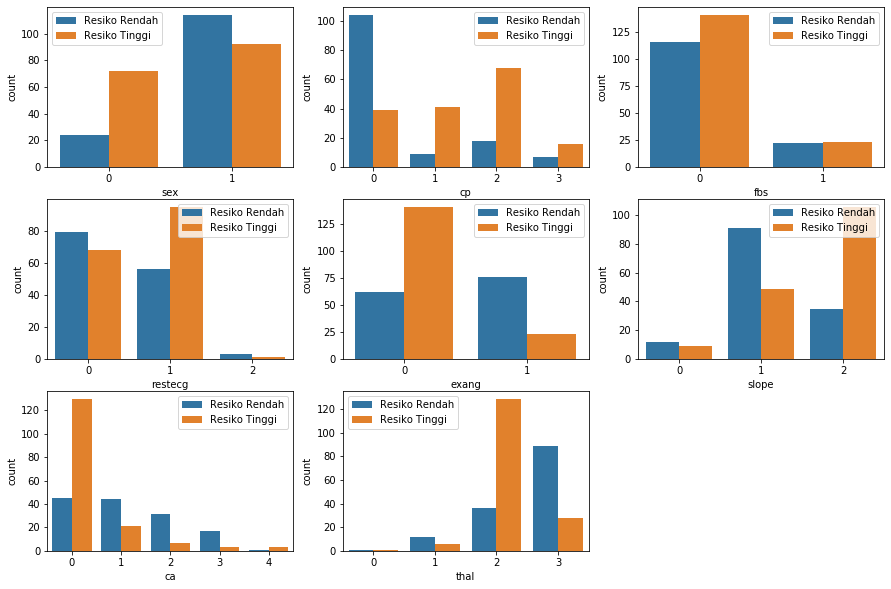

In [11]:
kolom_kategori = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
plt.figure(figsize=(15,10))
for i in range(0,8):
    plt.subplot(3,3,i+1)
    sns.countplot(data_heart[kolom_kategori[i]], hue ='target', data = data_heart)
    plt.legend(['Resiko Rendah', 'Resiko Tinggi'])

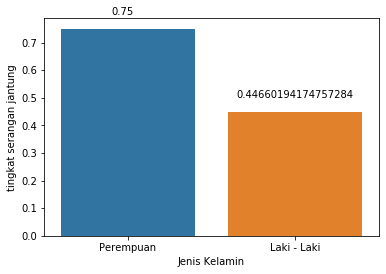

In [12]:
df_sex_target = data_heart.groupby('sex')['target'].mean().reset_index()
sns.barplot(df_sex_target.sex, df_sex_target.target)
plt.ylabel('tingkat serangan jantung')
plt.xlabel('Jenis Kelamin')
plt.xticks(df_sex_target.sex,['Perempuan', 'Laki - Laki'])
plt.text(-0.1, 0.8, df_sex_target.target[0])
plt.text(0.65, 0.5, df_sex_target.target[1])
plt.show()

C:\Users\Fadhlan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


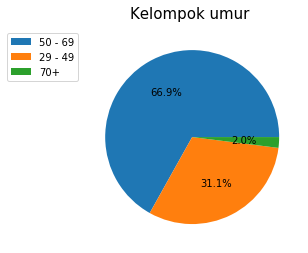

In [13]:
bins = [29, 50, 70, 77]
labels = ['29 - 49', '50 - 69', '70+']
data_heart['kelompok_umur'] = pd.cut(data_heart['age'] , bins=bins, labels = labels, include_lowest = True)

#pie chart // dominasi
plt.pie(data_heart['kelompok_umur'].value_counts(), autopct="%.1f%%")
plt.legend(data_heart['kelompok_umur'].unique(),bbox_to_anchor=(0.00, 1))
plt.title('Kelompok umur ', loc='center', pad=10, fontsize=15)
plt.show()

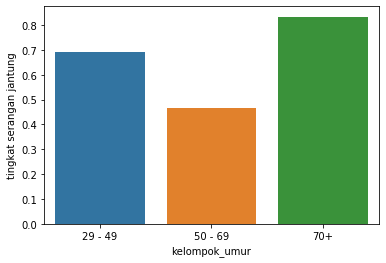

In [14]:
df_kelompok_umur_target = data_heart.groupby('kelompok_umur')['target'].mean().reset_index()
sns.barplot(df_kelompok_umur_target.kelompok_umur, df_kelompok_umur_target.target)
plt.ylabel('tingkat serangan jantung')
plt.xlabel('kelompok_umur')
plt.show()

In [15]:
df_kelompok_umur_target

,kelompok_umur,target
0,29 - 49,0.691489
1,50 - 69,0.465347
2,70+,0.833333


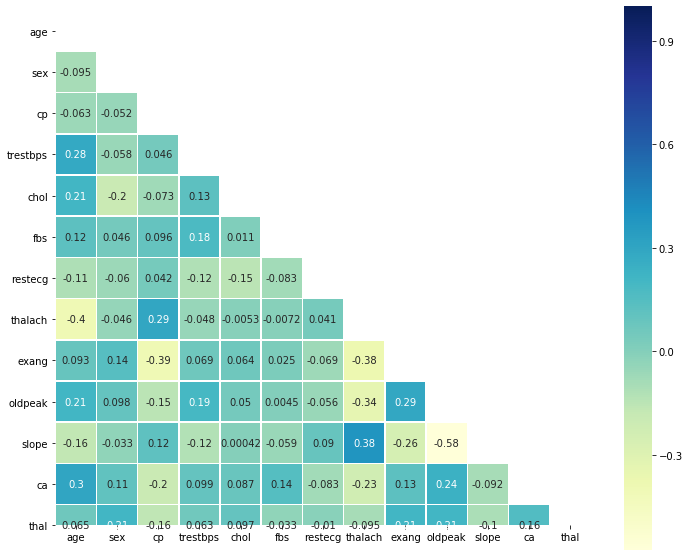

In [16]:
fitur = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
korelasi = data_heart[fitur].corr()
mask = np.zeros_like(korelasi)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize= (12, 10))
sns.heatmap(korelasi, mask = mask, cmap = 'YlGnBu', annot = True, linewidth = .5, square = True)
plt.yticks(rotation=0)
plt.show()

# Standarization

In [17]:
from sklearn.preprocessing import StandardScaler

#kita buang kelompok umur dulu
data_heart = data_heart.drop('kelompok_umur', axis=1)
std_scaler = StandardScaler()
fitur_scaled = std_scaler.fit_transform(data_heart.drop('target',axis=1))

In [18]:
#fitur_scaled = std_scaler.transform(data_heart.drop('target',axis=1))

In [19]:
df_scaled = pd.DataFrame(fitur_scaled,columns=data_heart.columns[:-1])
df_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.949794,0.682656,1.976470,0.764066,-0.261285,2.389793,-1.002541,0.018826,-0.698344,1.084022,-2.271182,-0.714911,-2.147955
1,-1.928548,0.682656,1.005911,-0.091401,0.067741,-0.418446,0.901657,1.636979,-0.698344,2.118926,-2.271182,-0.714911,-0.513994
2,-1.485726,-1.464866,0.035352,-0.091401,-0.822564,-0.418446,-1.002541,0.980971,-0.698344,0.307844,0.979514,-0.714911,-0.513994
3,0.174856,0.682656,0.035352,-0.661712,-0.203222,-0.418446,0.901657,1.243374,-0.698344,-0.209608,0.979514,-0.714911,-0.513994
4,0.285561,-1.464866,-0.935208,-0.661712,2.080602,-0.418446,0.901657,0.587366,1.431958,-0.382092,0.979514,-0.714911,-0.513994


## train test split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_scaled, data_heart['target'], test_size=0.20, random_state=45)
X_test = std_scaler.transform(X_test)

In [21]:
print('Jumlah data train :', X_train.shape)
print('Jumlah data test :', X_test.shape)

Jumlah data train : (241, 13)
Jumlah data test : (61, 13)


# KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Confusion Matrix :\n', confusion_matrix(y_test,pred))
print('Classification Report :\n', classification_report(y_test,pred))

Confusion Matrix :
 [[17 10]
 [ 5 29]]
Classification Report :
               precision    recall  f1-score   support

           0       0.77      0.63      0.69        27
           1       0.74      0.85      0.79        34

    accuracy                           0.75        61
   macro avg       0.76      0.74      0.74        61
weighted avg       0.76      0.75      0.75        61



### Mencari k-values n_neighbors terbaik

In [24]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
parameter_knn = {'n_neighbors': np.arange(1,50)}
#mencari k-values terbaik dengan GridSearchCV
knn_cv_model = GridSearchCV(knn, parameter_knn, cv = 5, verbose=3).fit(X_train, y_train)

n_neig = knn_cv_model.best_params_['n_neighbors']

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.796, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.729, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.729, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.792, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.750, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.837, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... n_neighbors=10, score=0.878, total=   0.0s
[CV] n_neighbors=10 ..................................................
[CV] ...................... n_neighbors=10, score=0.771, total=   0.0s
[CV] n_neighbors=10 ..................................................
[CV] ...................... n_neighbors=10, score=0.854, total=   0.0s
[CV] n_neighbors=10 ..................................................
[CV] ...................... n_neighbors=10, score=0.792, total=   0.0s
[CV] n_neighbors=10 ..................................................
[CV] ...................... n_neighbors=10, score=0.792, total=   0.0s
[CV] n_neighbors=11 ..................................................
[CV] ...................... n_neighbors=11, score=0.857, total=   0.0s
[CV] n_neighbors=11 ..................................................
[CV] ...................... n_neighbors=11, score=0.771, total=   0.0s
[CV] n_neighbors=11 ..................................................
[CV] .

[CV] ...................... n_neighbors=24, score=0.812, total=   0.0s
[CV] n_neighbors=24 ..................................................
[CV] ...................... n_neighbors=24, score=0.875, total=   0.0s
[CV] n_neighbors=25 ..................................................
[CV] ...................... n_neighbors=25, score=0.837, total=   0.0s
[CV] n_neighbors=25 ..................................................
[CV] ...................... n_neighbors=25, score=0.771, total=   0.0s
[CV] n_neighbors=25 ..................................................
[CV] ...................... n_neighbors=25, score=0.833, total=   0.0s
[CV] n_neighbors=25 ..................................................
[CV] ...................... n_neighbors=25, score=0.833, total=   0.0s
[CV] n_neighbors=25 ..................................................
[CV] ...................... n_neighbors=25, score=0.875, total=   0.0s
[CV] n_neighbors=26 ..................................................
[CV] .

[CV] ...................... n_neighbors=36, score=0.792, total=   0.0s
[CV] n_neighbors=36 ..................................................
[CV] ...................... n_neighbors=36, score=0.771, total=   0.0s
[CV] n_neighbors=36 ..................................................
[CV] ...................... n_neighbors=36, score=0.833, total=   0.0s
[CV] n_neighbors=37 ..................................................
[CV] ...................... n_neighbors=37, score=0.837, total=   0.0s
[CV] n_neighbors=37 ..................................................
[CV] ...................... n_neighbors=37, score=0.792, total=   0.0s
[CV] n_neighbors=37 ..................................................
[CV] ...................... n_neighbors=37, score=0.792, total=   0.0s
[CV] n_neighbors=37 ..................................................
[CV] ...................... n_neighbors=37, score=0.792, total=   0.0s
[CV] n_neighbors=37 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    0.9s finished
C:\Users\Fadhlan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [25]:
print('K value terbaik dengan GridSearchCV adalah : ', n_neig)

K value terbaik dengan GridSearchCV adalah :  24


## bandingkan dengan manual di bawah ini

In [26]:
def find_k_values(X_train, y_train):
    error_rate = []

    for i in range(1,40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))
        
    plt.figure(figsize=(10,6))
    plt.plot(range(1,40),error_rate,color='green', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K Value')
    plt.ylabel('Error Rate')
    plt.show()

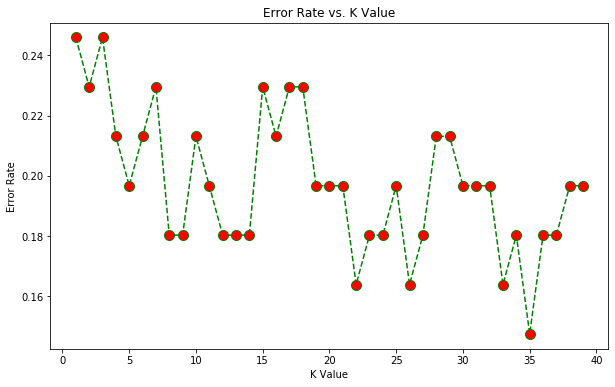

In [27]:
find_k_values(X_train, y_train)

In [28]:
#disini kita pakai 35 aja sesuai dengan grafik


knn_new = KNeighborsClassifier(n_neighbors = 35).fit(X_train, y_train)
y_pred = knn_new.predict(X_test)
print('Accuracy score for KNN: {}\n'.format(accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score for KNN: 0.8524590163934426

[[19  8]
 [ 1 33]]
              precision    recall  f1-score   support

           0       0.95      0.70      0.81        27
           1       0.80      0.97      0.88        34

    accuracy                           0.85        61
   macro avg       0.88      0.84      0.84        61
weighted avg       0.87      0.85      0.85        61



In [29]:
import pickle
pickle.dump(knn_new, open('model.pkl', 'wb'))

# Principal Component Analysis (PCA)

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x = df_scaled.loc[:, fitur].values
data = pca.fit_transform(x)

In [31]:
pca_df = pd.DataFrame(data = data, columns = ['PCA1', 'PCA2'])

In [32]:
final_df = pd.concat([pca_df, data_heart[['target']]], axis = 1)
final_df

,PCA1,PCA2,target
0,0.603024,2.291914,1.0
1,-0.478588,-0.988416,1.0
2,-1.847655,0.020559,1.0
3,-1.724377,-0.490040,1.0
4,-0.403288,0.278693,1.0
...,...,...,...
298,-0.727607,-1.055103,0.0
299,2.483185,0.504001,0.0
300,1.762062,-2.333697,0.0
301,-0.860915,1.062696,0.0


In [33]:
final_df.dropna(subset = ['PCA1','PCA2','target'], inplace=True)
final_df

,PCA1,PCA2,target
0,0.603024,2.291914,1.0
1,-0.478588,-0.988416,1.0
2,-1.847655,0.020559,1.0
3,-1.724377,-0.490040,1.0
4,-0.403288,0.278693,1.0
...,...,...,...
297,1.112720,-0.550608,0.0
298,-0.727607,-1.055103,0.0
299,2.483185,0.504001,0.0
300,1.762062,-2.333697,0.0


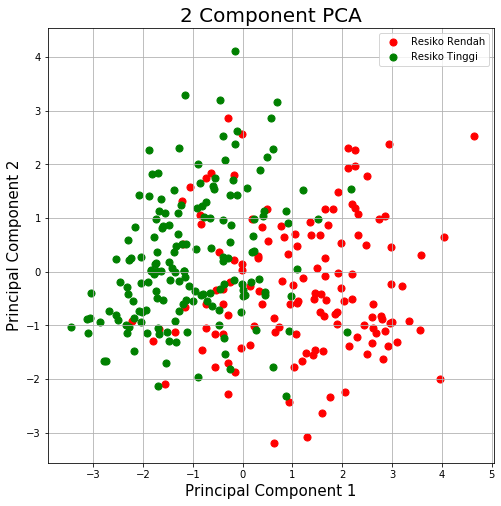

In [34]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = [0.0, 1.0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    index = final_df['target'] == target
    ax.scatter(final_df.loc[index, 'PCA1']
               , final_df.loc[index, 'PCA2']
               , c = color
               , s = 50)
ax.legend(['Resiko Rendah', 'Resiko Tinggi'])
ax.grid()

In [35]:
print('Jumlah fitur asli :', df_scaled.shape[1])
print('Jumlah fitur setelah dikurangi:', pca_df.shape[1])

Jumlah fitur asli : 13
Jumlah fitur setelah dikurangi: 2


In [36]:
pca.explained_variance_ratio_

array([0.21313479, 0.11859478])